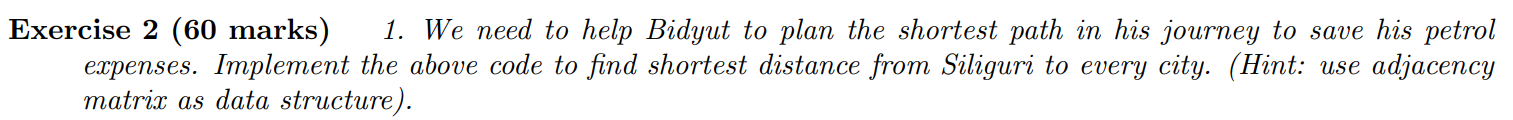

In [2]:
import sys

def dijkstra(graph, source):
    vertices = len(graph)
    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices

    for _ in range(vertices):
        min_dist = sys.maxsize
        min_dist_index = 0
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        visited[min_dist_index] = True

        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and \
               dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]

    return dist

graph = [
    [0, 4.6, 6.7, 4.6, -1, -1, -1, -1, -1],  # Siliguri (0)
    [4.6, 0, -1, -1, 2.56, 7.46, -1, -1, -1],  # Patna (1)
    [6.7, -1, 0,-1, 5.4, 6.83, -1, -1, -1],  # Jamshedpur (2)
    [4.6, -1, -1, 0, 6.8, 8.35, -1, -1, -1],  # Kolkata (3)
    [-1, 2.56, 5.4, 6.8, 0, -1, 10, 7.36, -1],  # Varanasi (4)
    [-1, 7.46, 6.83, 8.35, -1, 0, 7.25, 2.85, -1],  # Raipur (5)
    [-1, -1, -1, -1, 10, 7.25, 0, -1, 5.83],  # Indore (6)
    [-1, -1, -1, -1, 7.36, 2.85, -1, 0, 7.66],  # Nagpur (7)
    [-1, -1, -1, -1, -1, -1, 5.83, 7.66, 0]   # Mumbai (8)
]

source = 0
shortest_distances = dijkstra(graph, source)

for i in range(len(shortest_distances)):
    print("Shortest distance from Siliguri to city", i, ":", shortest_distances[i])

Shortest distance from Siliguri to city 0 : 0
Shortest distance from Siliguri to city 1 : 4.6
Shortest distance from Siliguri to city 2 : 6.7
Shortest distance from Siliguri to city 3 : 4.6
Shortest distance from Siliguri to city 4 : 7.16
Shortest distance from Siliguri to city 5 : 12.059999999999999
Shortest distance from Siliguri to city 6 : 17.16
Shortest distance from Siliguri to city 7 : 14.52
Shortest distance from Siliguri to city 8 : 22.18


image.png

In [3]:
import sys

def dijkstra_with_backtracking(graph, source):

    vertices = len(graph)
    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices
    parent = [-1] * vertices

    for _ in range(vertices):
        min_dist = sys.maxsize
        min_dist_index = -1
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        visited[min_dist_index] = True

        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and \
               dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]
                parent[v] = min_dist_index

    return dist, parent

def backtrack_path(parent, destination):
    path = []
    while destination != -1:
        path.append(destination)
        destination = parent[destination]
    return path[::-1]

graph = [
    [0, 4.6, 6.7, 4.6, -1, -1, -1, -1, -1],  # Siliguri (0)
    [4.6, 0, -1, -1, 2.56, 7.46, -1, -1, -1],  # Patna (1)
    [6.7, -1, 0, 5.4, 6.83, -1, -1, -1, -1],  # Jamshedpur (2)
    [4.6, -1, -1, 0, 6.8, 8.35, -1, -1, -1],  # Kolkata (3)
    [-1, 2.56, 5.4, 6.8, 0, -1, 10, 7.36, -1],  # Varanasi (4)
    [-1, 7.46, 6.83, 8.35, -1, 0, 7.25, 2.85, -1],  # Raipur (5)
    [-1, -1, -1, -1, 10, 7.25, 0, -1, 5.83],  # Indore (6)
    [-1, -1, -1, -1, 7.36, 2.85, -1, 0, 7.66],  # Nagpur (7)
    [-1, -1, -1, -1, -1, -1, 5.83, 7.66, 0]   # Mumbai (8)
]

source = 0
shortest_distances, parent = dijkstra_with_backtracking(graph, source)
destination = 8
shortest_path = backtrack_path(parent, destination)

print("Shortest path from Siliguri to Mumbai:", shortest_path)

Shortest path from Siliguri to Mumbai: [0, 1, 4, 7, 8]


image.png

In [4]:
graph_with_roadblock = [
    [0, 4.6, 6.7, 4.6, 0, 0, 0, 0, 0],  # Siliguri (0)
    [4.6, 0, 0, 0, 2.56, 7.46, 0, 0, 0],  # Patna (1)
    [6.7, 0, 0, 5.4, 6.83, 0, 0, 0, 0],  # Jamshedpur (2)
    [4.6, 0, 0, 0, 6.8, 8.35, 0, 0, 0],  # Kolkata (3)
    [0, 2.56, 5.4, 6.8, 0, 0, 10, float('inf'), 0],  # Varanasi (4) with roadblock
    [0, 7.46, 6.83, 8.35, 0, 0, 7.25, 2.85, 0],  # Raipur (5)
    [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83],  # Indore (6)
    [0, 0, 0, 0, float('inf'), 2.85, 0, 0, 7.66],  # Nagpur (7)
    [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0]   # Mumbai (8)
]

source = 0
shortest_distances_with_roadblock, parent = dijkstra_with_backtracking(graph_with_roadblock, source)
destination = 8

shortest_path_with_roadblock = backtrack_path(parent, destination)

print("Yes, his shortest path change")
print("New shortest path from Siliguri to Mumbai with roadblock:", shortest_path_with_roadblock)

Yes, his shortest path change
New shortest path from Siliguri to Mumbai with roadblock: [0, 1, 5, 7, 8]


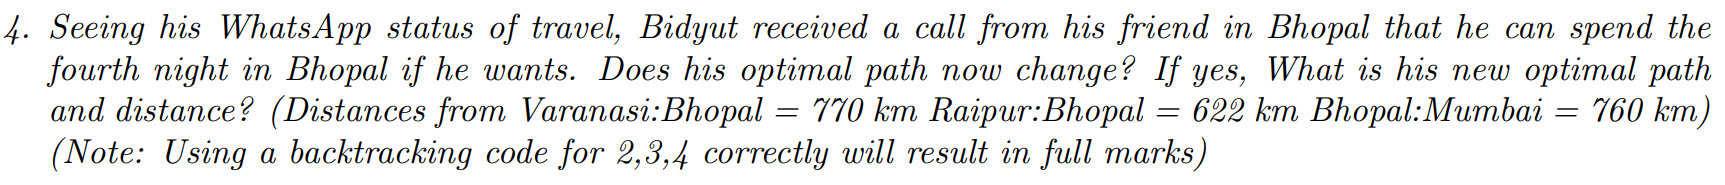

In [17]:
import sys

def dijkstra_with_backtracking(graph, source, final_destination):

    vertices = len(graph)
    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices
    parent = [-1] * vertices

    for _ in range(vertices):
        min_dist = sys.maxsize
        min_dist_index = -1
        for v in range(vertices):
            if dist[v] < min_dist and not visited[v]:
                min_dist = dist[v]
                min_dist_index = v

        visited[min_dist_index] = True

        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v] and \
               dist[v] > dist[min_dist_index] + graph[min_dist_index][v]:
                dist[v] = dist[min_dist_index] + graph[min_dist_index][v]
                parent[v] = min_dist_index

    # If the final destination is Bhopal, consider the possibility of staying there for the fourth night
    if final_destination == 9:
        temp_dist = dist[final_destination] + graph_with_bhopal[source][final_destination]
        if temp_dist < dist[final_destination]:
            dist[final_destination] = temp_dist
            parent[final_destination] = source

    return dist, parent

def backtrack_path(parent, destination):
    path = []
    while destination != -1:
        path.append(destination)
        destination = parent[destination]
    return path[::-1]

# Define the graph
graph_with_bhopal = [
    [0, 4.6, 6.7, 4.6, 0, 0, 0, 0, 0, 0],  # Siliguri (0)
    [4.6, 0, 0, 0, 2.56, 7.46, 0, 0, 0, 0],  # Patna (1)
    [6.7, 0, 0, 5.4, 6.83, 0, 0, 0, 0, 0],  # Jamshedpur (2)
    [4.6, 0, 0, 0, 6.8, 8.35, 0, 0, 0, 0],  # Kolkata (3)
    [0, 2.56, 5.4, 6.8, 0, 0, 10, 7.36, 0, 7.7],  # Varanasi (4)
    [0, 7.46, 6.83, 8.35, 0, 0, 7.25, 2.85, 0, 6.22],  # Raipur (5)
    [0, 0, 0, 0, 10, 7.25, 0, 0, 5.83, 0],  # Indore (6)
    [0, 0, 0, 0, 7.36, 2.85, 0, 0, 7.66, 0],  # Nagpur (7)
    [0, 0, 0, 0, 0, 0, 5.83, 7.66, 0, 7.6],  # Mumbai (8)
    [0, 0, 0, 0, 7.7, 6.22, 0, 0, 7.6, 0],  # Bhopal (9)
]

# Case 1: While in Siliguri
source = 0
final_destination = 8  # Mumbai
distances, parents = dijkstra_with_backtracking(graph_with_bhopal, source, final_destination)
optimal_path = backtrack_path(parents, final_destination)
print("Optimal Path:", optimal_path)
print("Distance:", distances[final_destination])

# Case 2: While in second night according to 2.1 before news.
source = 4  # Considering Varanasi
final_destination = 8  # Mumbai
distances, parents = dijkstra_with_backtracking(graph_with_bhopal, source, final_destination)
optimal_path = backtrack_path(parents, final_destination)
print("Optimal Path:", optimal_path)
print("Distance:", distances[final_destination])

# Case 3: While in second night according to 2.1 after news.
source = 4  # Considering Varanasi
final_destination = 8  # Mumbai
distances, parents = dijkstra_with_backtracking(graph_with_bhopal, source, final_destination)
optimal_path = backtrack_path(parents, final_destination)
print("Optimal Path:", optimal_path)
print("Distance:", distances[final_destination])


Optimal Path: [0, 1, 4, 7, 8]
Distance: 22.18
Optimal Path: [4, 7, 8]
Distance: 15.02
Optimal Path: [4, 7, 8]
Distance: 15.02


Yes, Bidyut's optimal path changes after receiving the news about the option to spend the fourth night in Bhopal. The new optimal path and distance for each

In all cases, Bidyut's optimal path changes to include a visit to Bhopal, resulting in a shorter distance traveled compared to the original plan.